In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Часть 1 - простая линейная регрессия

1. Обучить модель простой (парной) линейной регрессии, используя для обучения значения х1 и y.

Для обучения модели простой линейной регрессии, были использованы значения x1 и y. С помощью метода fit, модель была обучена на известных данных - признаках x1 и целевой переменной. Модель линейной регрессии находит наилучшую прямую линию, которая минимизирует сумму квадратов разностей между предсказанными значениями и фактическими значениями.

In [467]:
x1 = np.array([3, 3, 6, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([25.3, 28.8, 30.1, 30, 32.5, 31.4, 32])
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1, y)

LinearRegression()

2. Выполнить предсказание.

Далее, при помощи метода predict, были получены предсказанные значения, которые соответствуют полученному уравнению линейной регрессии.

In [470]:
y_pred = lr.predict(x1)
y_pred

array([27.29553571, 27.29553571, 30.01428571, 30.01428571, 30.92053571,
       31.82678571, 32.73303571])

3. Создать датафрейм с истинными и предсказанными значениями. Вывести его.

Далее, был создан датафрейм с истинными и предсказанными значениями. Можно заметить, что модель неплохо справилась с предсказаниями, значения находятся близко друг к другу.

In [473]:
target_predict = pd.DataFrame([y, y_pred], index=['Actual', 'Predicted']).T
target_predict

,Actual,Predicted
0,25.3,27.295536
1,28.8,27.295536
2,30.1,30.014286
3,30.0,30.014286
4,32.5,30.920536
5,31.4,31.826786
6,32.0,32.733036


4. Подсчитать и вывести метрики качества регрессии

Далее, для подсчета метрик качества регрессии были использованы такие метрики, как средняя квадратичная ошибка - MSE, средняя абсолютная ошибка MAE (Mean absolute error), среднеквадратичная ошибка RMSE, Коэффициент детерминации R2. 
MSE позволяет оценить, насколько сильно модель отклоняется от истинных значений целевой переменной. Чем меньше значение MSE, тем более точно модель предсказывает значения. R2 – метрика, которая определяет долю изменений, обусловленных влиянием признаков на целевую переменную. Касательно полученных результатов, можно сказать, что модель была неплохо обучена и она объясняет примерно половину изменений, обусловленных влиянием на целевую переменную.

In [476]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'mse: {mse:.2f}, mae: {mae:.2f}, rmse: {rmse:.2f}, r2: {r2:.2f}')

mse: 1.35, mae: 0.91, rmse: 1.16, r2: 0.74


5. Вывести значение коэффициентов a и b

Далее, были выведены значения коэффициентов модели линейной регрессии. Уравнение имеет вид y = a + bx, где a - смещение, b - вес при x1.

In [479]:
print(f'Коэффициент a: {lr.intercept_:.2f}')
print(f'Коэффициент b: {lr.coef_[0]:.2f}')

Коэффициент a: 24.58
Коэффициент b: 0.91


6. Выполнить визуализацию регрессии: точки ( scatter plot ) и линия регрессии.

Далее, была выполнена визуализация регрессии: точки (scatter plot) и линия регрессии. В уравнении регрессии коэффициент a отвечает за смещение, коэффициент b за наклон прямой.

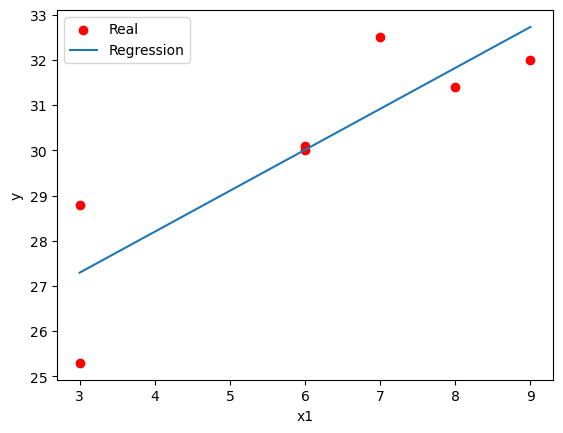

In [482]:
f, ax = plt.subplots()
ax.scatter(x1, y, label='Real', color = 'Red')
ax.plot(x1, y_pred, label ='Regression')
ax.set_xlabel('x1')
ax.set_ylabel('y')
plt.legend()
plt.show()

7. Построить график с разницей предсказанного и истинного значения по каждой точке.

На построенном графике остатков можно увидеть разницу между истинными и предсказанными значениями (отклонение от истинных значений). Максимальная разница - 2.

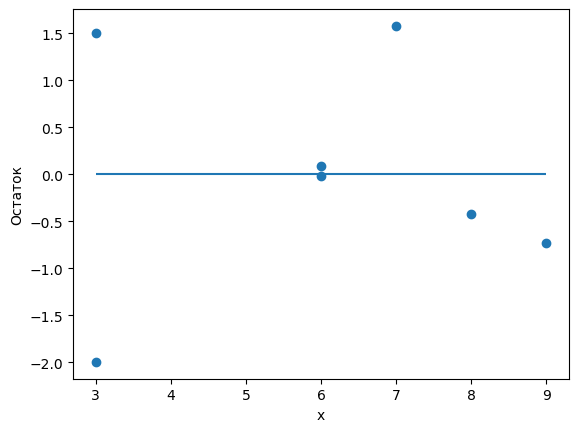

In [485]:
f, ax = plt.subplots()
ax.scatter(x1, y-y_pred)
ax.hlines(0, x1.min(), x1.max())
ax.set_ylabel('Остаток')
ax.set_xlabel('x')
plt.show()

8. Построить график

На построенном графике можно увидеть отклонение предсказанных значений от реальных.

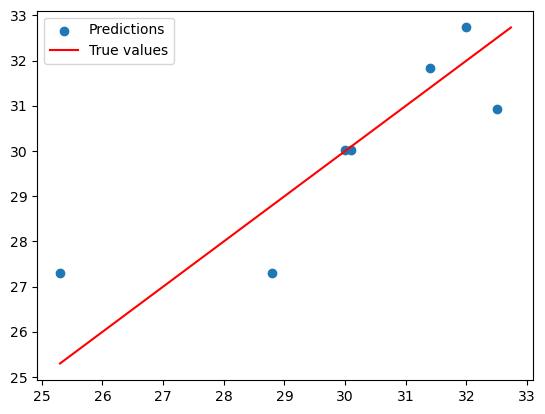

In [488]:
min_value = min(np.min(y), np.min(y_pred))
max_value = max(np.max(y), np.max(y_pred))
plt.scatter(y, y_pred, label='Predictions')
plt.plot([min_value, max_value], [min_value, max_value], color='Red', label='True values')
plt.legend()
plt.show()

9. Сделать выводы.

В результате выполнения первой части был изучен процесс обучения модели простой линейной регрессии, процесс предсказания значений, на основе имеющихся, процесс подсчета метрик, а также сравнения предсказанных значений с истинными.

##  Часть 2 - Полиномиальная регрессия

1. Использовать PolynomialFeatures для реализации модели полиномиальной регрессии. Выбрать степень полинома самостоятельно.

Далее, для реализации модели полиномиальной регрессии был использован polynomialfeatures. Объект данного класса представляет собой диапазон наборов значений, возведенных в определенную степень. Например, в данном случае была указана вторая степень, следовательно был получен набор полиномов второй степени.

In [494]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)
y_poly = np.array([29.8, 58.8, 72.2, 101.5, 141.0, 135.1])
x_poly = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
X_poly = pd.DataFrame(poly_features.fit_transform(x_poly), columns=['zero', 'one', 'two'])
pr = LinearRegression()
X_poly

,zero,one,two
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0


2. Обучить модель полиномиальной регрессии.

Далее, при помощи метода fit была обучена модель линейной регрессии, на основе полиномов. 

In [497]:
pr.fit(X_poly, y_poly)

LinearRegression()

3. Выполнить предсказание.

Затем, было выполнено предсказание на основе имеющихся данных.

In [500]:
y_poly_pred = pr.predict(X_poly)
y_poly_pred

array([ 28.24642857,  56.17928571,  81.60857143, 104.53428571,
       124.95642857, 142.875     ])

4. Подсчитать и вывести метрики качества регрессии (MAE , R2).

Далее, были подсчитаны метрики качества полиномиальной регрессии. Метрика r2 является довольно высокой, значит модель показывает себя хорошо: предсказанные значения почти совпадают с истинными.

In [503]:
mae_pr = mean_squared_error(y_poly, y_poly_pred)
r2_pr = r2_score(y_poly, y_poly_pred)
print(f'mae: {mae_pr:.2f}, r2: {r2_pr:.2f}')

mae: 70.81, r2: 0.96


5. Выполнить визуализацию регрессии: точки и линия регрессия.

Далее, была выполнена визуализация полиномиальной регрессии.

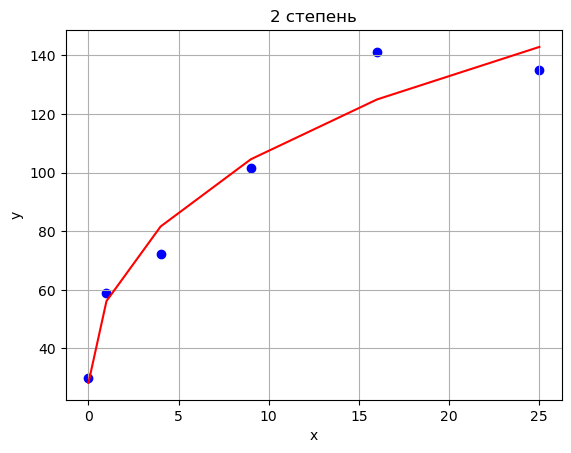

In [506]:
plt.scatter(X_poly.two, y_poly, color='blue', label='Actual')
plt.plot(X_poly.two, y_poly_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2 степень')
plt.grid()

6. Повторить пункты 1-5 минимум для ещё одной степени полинома (degree).

Далее, были повторены пункты для еще одной степени полинома - третьей. Метрика r2 выросла, значит модель стала более точно описывать существующие данные.

mae: 45.26, r2: 0.97


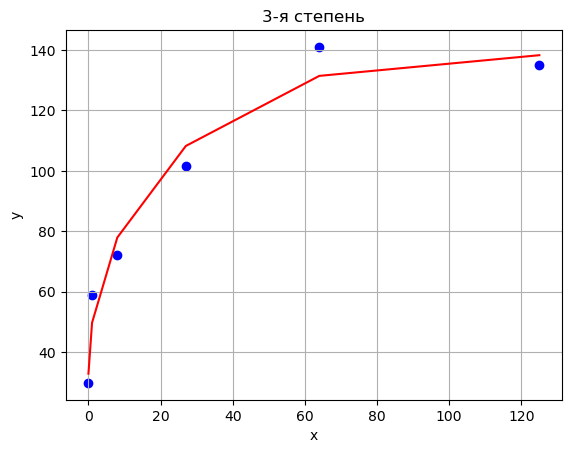

In [509]:
poly_features = PolynomialFeatures(degree = 3)
y_poly = np.array([29.8, 58.8, 72.2, 101.5, 141.0, 135.1])
x_poly = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
X_poly = pd.DataFrame(poly_features.fit_transform(x_poly), columns=['zero', 'one', 'two', 'three'])
pr = LinearRegression()

pr.fit(X_poly, y_poly)
y_poly_pred = pr.predict(X_poly)

mae_pr = mean_squared_error(y_poly, y_poly_pred)
r2_pr = r2_score(y_poly, y_poly_pred)
print(f'mae: {mae_pr:.2f}, r2: {r2_pr:.2f}')

plt.scatter(X_poly.three, y_poly, color='blue', label='Actual')
plt.plot(X_poly.three, y_poly_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-я степень')
plt.grid()
plt.show()

7. Сделать выводы

В результате выполнения второй части была обучена модель полиномиальной регрессии, были получены предсказанные значения, вычислены метрики качества, а также была выполнена визуализация полиномиальной регрессии.

## Часть 3 - Решение задачи регрессии различными методами

1. Загрузить набор данных car_price.csv.

- Car_ID Уникальный идентификатор каждого наблюдения (целое число)
- Symboling Присвоенный рейтинг страхового риска: +3 - автомобиль является рискованным, -3 - довольно безопасен. (категориальный)
- carCompany Название автомобильной компании
- fueltype Тип топлива
- aspiration Аспирация, используемая в автомобиле
- doornumber Количество дверей в автомобиле
- carbody Кузов автомобиля
- drivewheel Тип ведущего колеса
- enginelocation Расположение двигателя автомобиля
- wheelbase Колесная база автомобиля
- carlength Длина машины
- carwidth Ширина машины
- carheight Высота машины
- Вес автомобиля без пассажиров и багажа curbweight 
- enginetype Тип двигателя
- cylindernumber Баллон, помещенный в автомобиль
- enginesize Размер машины
- fuelsystem Топливная система автомобиля
- boreratio Коэффициент расточки вагона (
- stroke Stroke or volume inside the engine (Numeric)
- compressionratio Рабочий ход или объем внутри двигателя
- horsepower Мощность в лошадиных силах
- peakrpm Пиковые обороты автомобиля
- citympg Пробег по городу
- highwaympg Пробег по шоссе
- price Цена авто

In [515]:
df = pd.read_csv('carprice.csv')

Данные были загружены, теперь необходимо посмотреть на информацию датасета. В результате выполнения метода info можно заметить, что типы данных всех признаков соответствуют описанию, пропуски отсутствуют.

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [518]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Далее были оценены числовые данные, согласно известному описанию. Сar_id не несет в себе полезной информации, можно в дальнейшем избавиться от него. Значения признака symboling лежат в указанном диапазоне. В значениях признаков wheelbase, carlenght, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price аномалий не наблюдается.

In [520]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Далее, была произведена обработка категориальных признаков: в колонке CarName можно заметить, что первое слово встречается в нескольких строках, поэтому данный признак можно преобразовать, взяв только первое слово - непосредственно название машины, без модели.

In [522]:
df.select_dtypes(exclude='number')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


В признаке CarName были замечены неявные дубликаты: названия машин с опечатками, ошибки исправлены.

In [524]:
df.CarName.apply(lambda x: x.split()[0].lower()).value_counts()

CarName
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

In [525]:
df.CarName = df.CarName.apply(lambda x: x.split()[0].lower())

In [526]:
df.CarName.replace({
    'porcshce' : 'porsche',
    'vokswagen' : 'volkswagen',
    'toyouta' : 'toyota',
    'maxda' : 'mazda',
    'vw' : 'volkswagen',
}, inplace=True)

/var/folders/r_/s0q06yzd2_b7l2f8th48lxdc0000gn/T/ipykernel_28447/1762334492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CarName.replace({


В значениях признака CarName можно заметить большое количество уникальных значений, поэтому при использовании прямого кодирования, будет добавлено большое количество колонок, здесь необходимо применить порядковое кодирование.

In [528]:
df.CarName.value_counts()

CarName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

Далее, был проведен обзор других категориальных признаков.

In [530]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

В колонке тип топлива всего 2 уникальных значения, можно применить прямое кодирование.

In [532]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

В колонке aspiration всего 2 уникальных значения, можно применить прямое кодирование

In [534]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [535]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [536]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [537]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [538]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [539]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [540]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

Аналогично, другие категориальные колонки, где значений больше 3, необходимо закодировать в виде порядка, а где меньше - прямо. Перед кодированием, числовые колонки будут сохранены в отдельную переменную.

In [542]:
from sklearn.preprocessing import OrdinalEncoder
numeric_cols = df.select_dtypes(exclude='object').columns.drop(['car_ID', 'price'])
oe = OrdinalEncoder()
ordinal_columns = []
dummy_columns = []
for col in df.select_dtypes(exclude='number').columns:
    if len(df[col].unique()) >= 4:
        ordinal_columns.append(col)
    else:
        dummy_columns.append(col)
dummy_cols = pd.get_dummies(df[dummy_columns], drop_first=True)
df = pd.concat([df, dummy_cols], axis = 1)
df[ordinal_columns] = oe.fit_transform(df[ordinal_columns])
df.drop(columns = ['car_ID', 'fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation'], inplace = True)

Категориальные колонки были закодированы, итоговый датафрейм имеет новый вид.

In [544]:
df.head()

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,3,0.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,...,5000,21,27,13495.0,True,False,True,False,True,False
1,3,0.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,...,5000,21,27,16500.0,True,False,True,False,True,False
2,1,0.0,2.0,94.5,171.2,65.5,52.4,2823,5.0,3.0,...,5000,19,26,16500.0,True,False,True,False,True,False
3,2,1.0,3.0,99.8,176.6,66.2,54.3,2337,3.0,2.0,...,5500,24,30,13950.0,True,False,False,True,False,False
4,2,1.0,3.0,99.4,176.6,66.4,54.3,2824,3.0,1.0,...,5500,18,22,17450.0,True,False,False,False,False,False


Данные предобработаны, можно приступать к следующему этапу - выбору целевой переменной.

2. Выделить целевую переменную, которую необходимо предсказать (важно не ошибиться с выбором целевой переменной). Выполнить для целевой переменной визуализацию - построить гистограмму и boxplot.

В качестве целевой переменной был выбран признак цены автомобиля (price). Также, для целевой переменной была построена гистограмма и boxplot. Большинство значений цен автомобилей лежит в диапазоне  от 7000 до 16000, медианная цена - 10000.

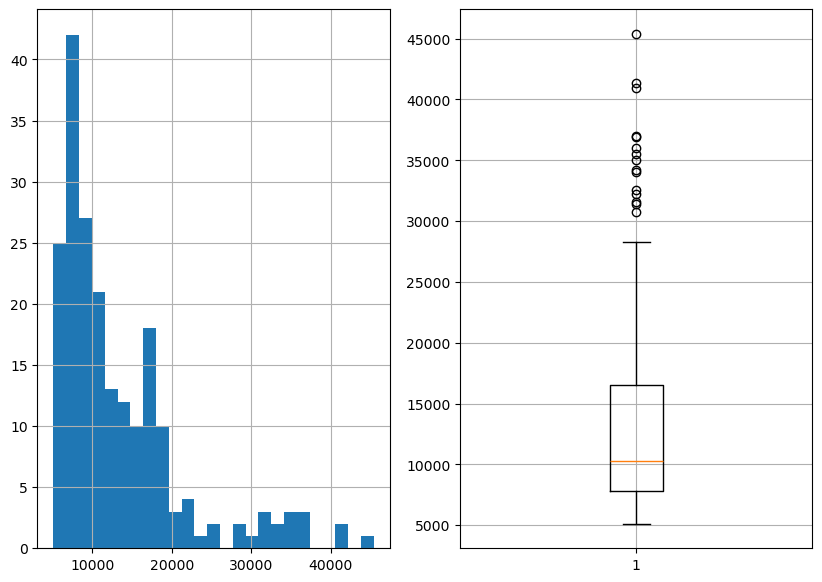

In [548]:
X = df.drop(columns = ['price'], axis = 1)
y = df.price

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
ax1.hist(y, bins = 25)
ax2.boxplot(y)
ax1.grid()
ax2.grid()
plt.show()

3. Построить матрицу диаграмм рассеяния.

Далее, была построена матрица диаграмм рассеяния. В результате построения матрицы диаграмм рассеяния, можно заметить корреляцию признаков друг с другом, а также корреляцию признаков с целевой переменной.

<Figure size 640x480 with 0 Axes>

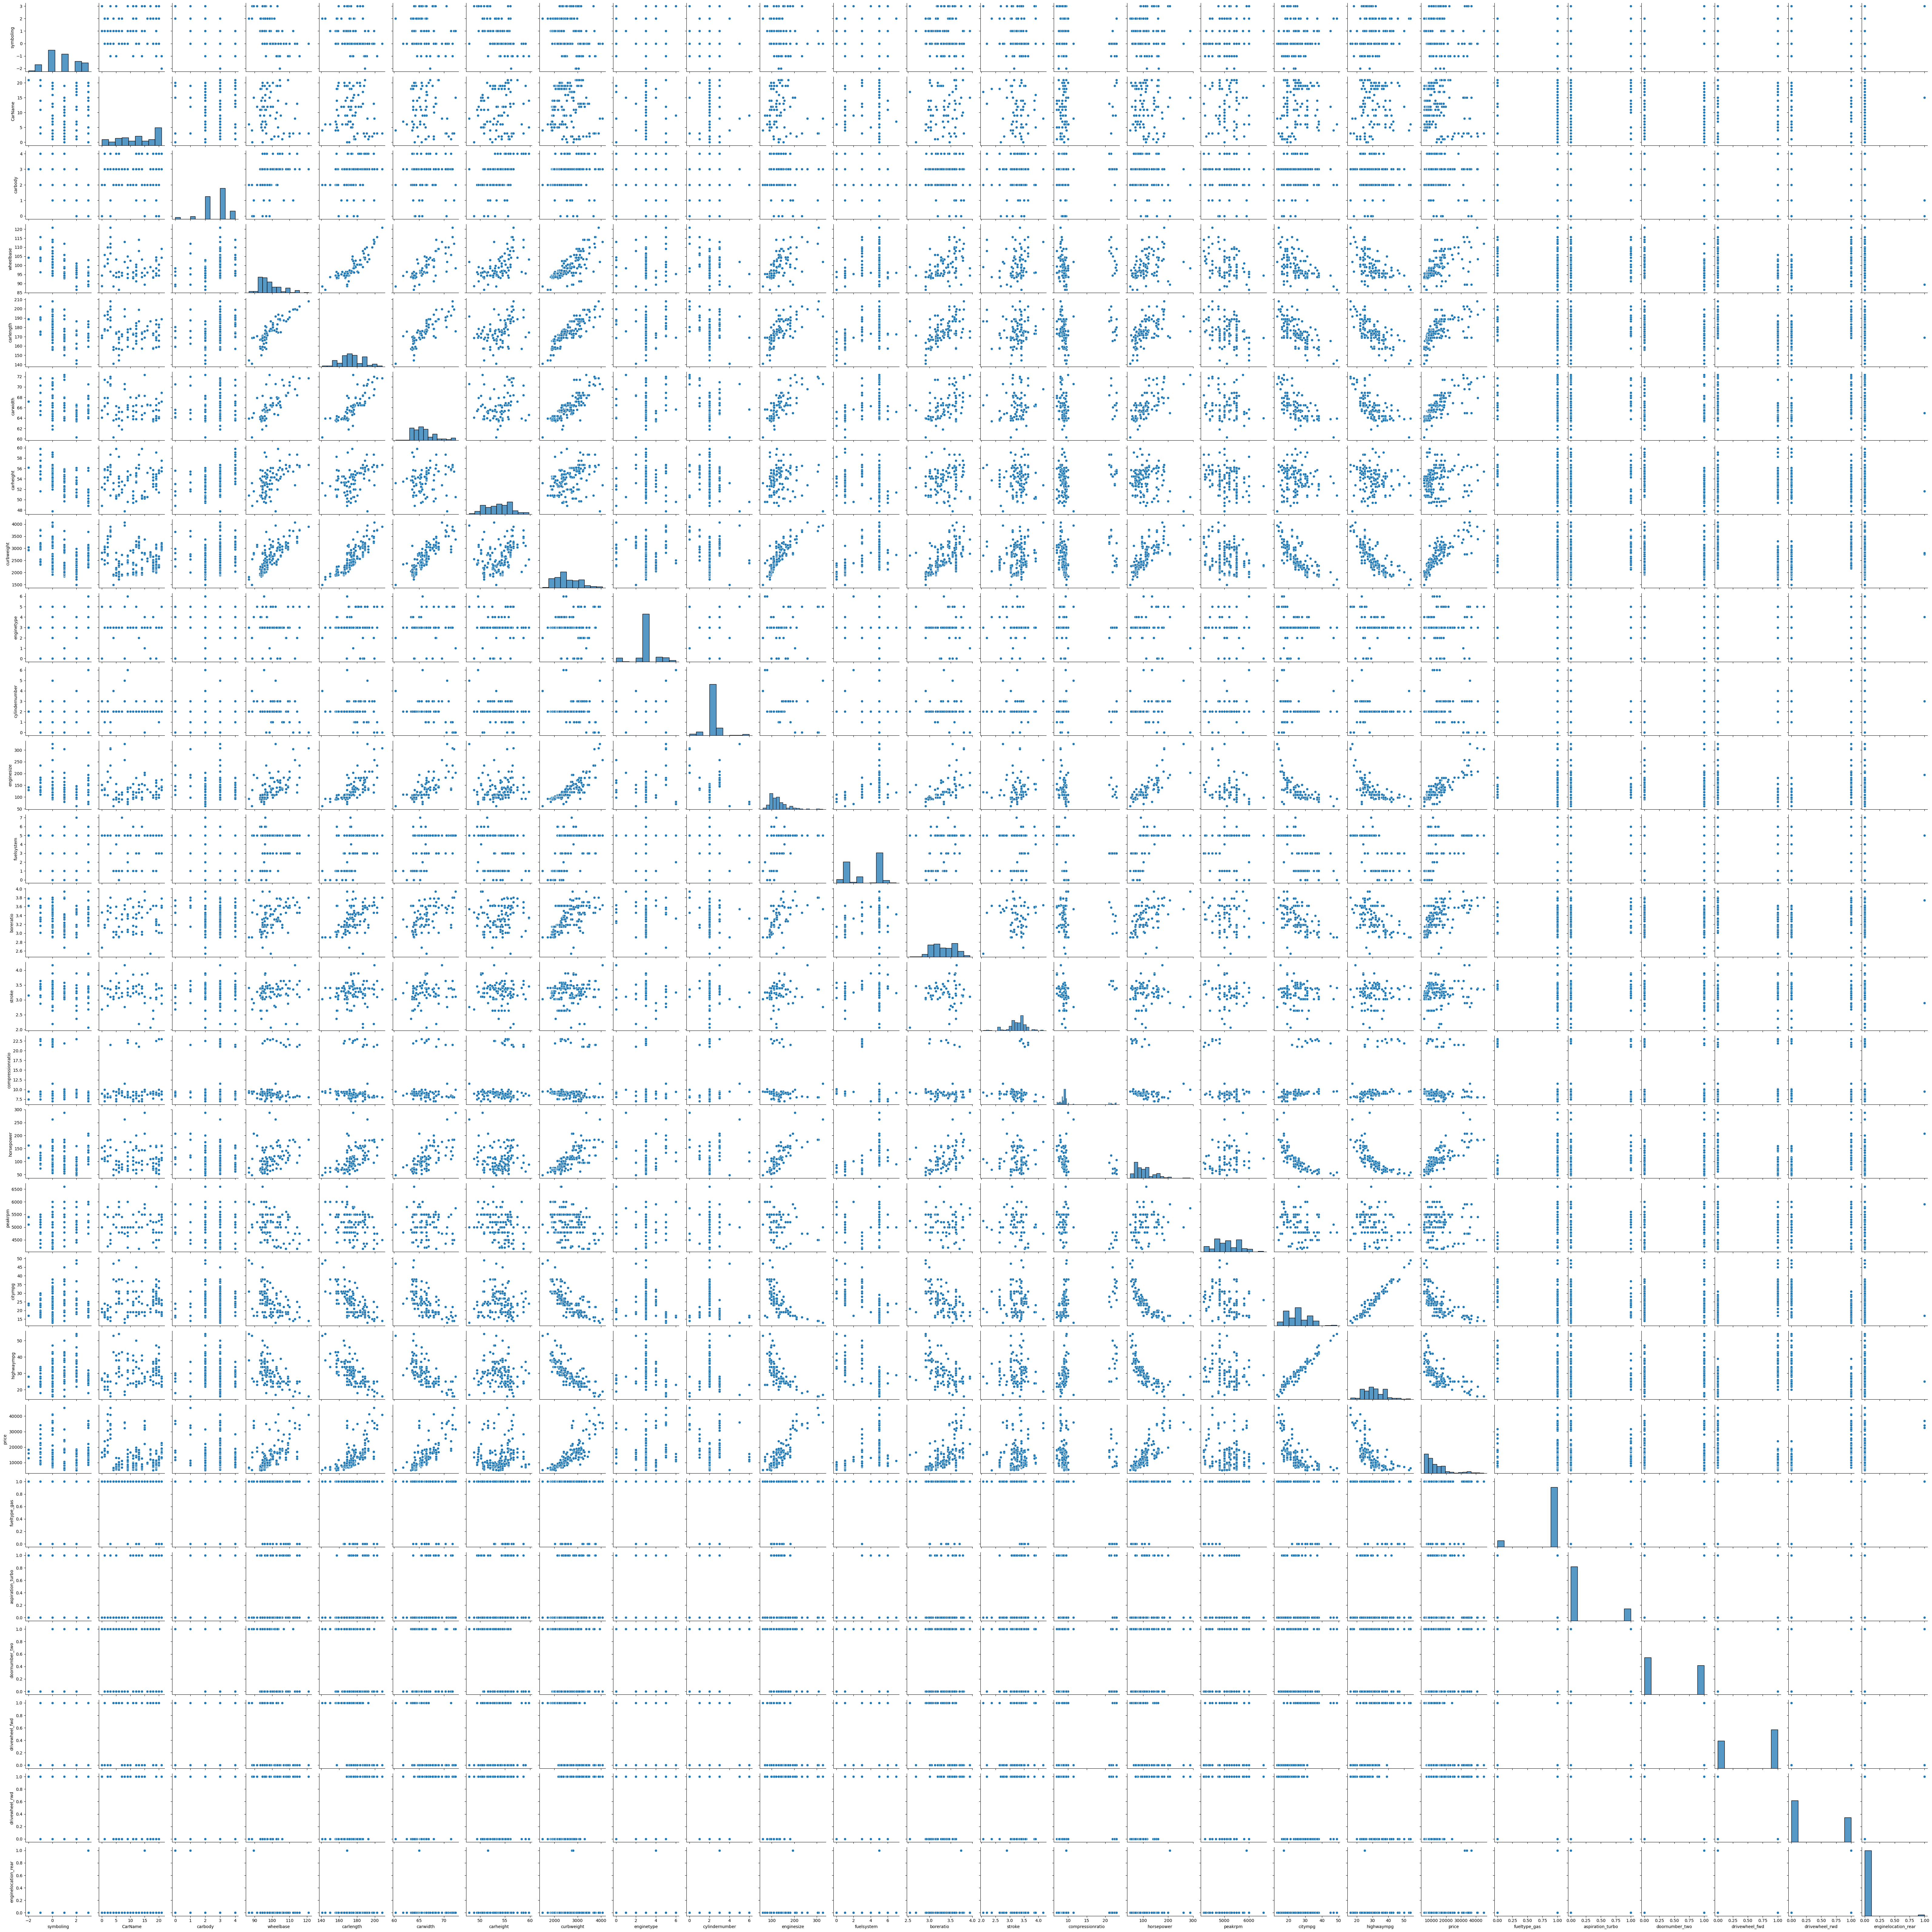

In [551]:
import seaborn as sns
plt.figure()
sns.pairplot(df)
plt.grid()
plt.show()

4. Разделить данные на обучающую и валидационные выборки.

Далее, при помощи метода train_test_split датафрейм был разделен на обучающую и валидационную (тестовую) выборки в соотношении 3:1.

In [554]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

5. Нормализовать числовые данные с помощью StandardScaler .

Затем, так как в наборе данных много признаков, диапазоны которых сильно отличаются, числовые признаки были приведены к единому масштабу. Для этого признаки были масштабированы и к ним применен метод стандартизации. Данный метод имеет цель привести данные к определенным стандартным значениям, чтобы обеспечить их более удобное сравнение и использование в моделях, а также минимизировать среднеквадратичную ошибку.

Для того, чтобы избежать утечки данных, StandardScaler был обучен только на тренировочной выборке.

In [558]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train[numeric_cols])
X_train.select_dtypes(exclude = 'object')
X_train[numeric_cols] = standard.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard.transform(X_test[numeric_cols])

6. Обучить модель линейной регрессии с помощью LinearRegression .

Затем, модель линейной регрессии была обучена на закодированных категориальных и  стандартизированных числовых данных.

In [561]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

7. Применить обученную модель на тестовой выборке и оценить её качество с помощью метрик (минимум
4 метрики).

Затем, были получены метрики качества. Коэффициент детерминации R2 имеет довольно высокое значение, что показывает хорошую предсказательную способность обученной модели.

In [564]:
y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = root_mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
lin_reg_metrics = f'mse: {lr_mse:.2f}, mae: {lr_mae:.2f}, rmse: {lr_rmse:.2f}, r2: {lr_r2:.2f}'
print(lin_reg_metrics)

metrics = {}

metrics['Linear Regression'] = {
    'MSE': lr_mse,
    'MAE': lr_mae,
    'RMSE': lr_rmse,
    'R2': lr_r2
}

mse: 10127444.15, mae: 2085.61, rmse: 3182.36, r2: 0.85


8. Создать датафрейм с истинными и предсказанными значениями. Вывести его.

Затем, был создан датафрейм с истинными и предсказанными значениями.

In [567]:
target_pred = pd.DataFrame({'target': y_test, 'predict': y_pred})
target_pred

,target,predict
15,30760.000,25994.451394
9,17859.167,20132.786162
100,9549.000,9706.670626
132,11850.000,13010.081302
68,28248.000,25647.260032
95,7799.000,6397.672059
159,7788.000,7750.866630
162,9258.000,5345.539317
147,10198.000,8195.139076
182,7775.000,6652.390394


9. Создать датафрейм с признаками и значением коэффициентов для каждого признака. Сделать выводы относительно важности признаков.

Затем, был создан датафрейм со значениями коэффициента для каждого признака. Можно заметить, что чем значение коэффициента ближе к 0, тем меньше признак влияет на целевую переменную. Например, признак cylindernumber имеет наименьшее значение, следовательно меньше всего влияет на цену автомобиля. Наибольшее влияние имеет enginelocation (расположение двигателя автомобиля) со значением коэффициента 11581.

In [570]:
pd.DataFrame({'feature': lr.feature_names_in_, 'coef': lr.coef_})

,feature,coef
0,symboling,214.649582
1,CarName,-190.845879
2,carbody,-1315.004088
3,wheelbase,1031.883825
4,carlength,-121.743207
5,carwidth,1559.501798
6,carheight,494.226539
7,curbweight,553.265839
8,enginetype,159.519948
9,cylindernumber,-23.801750


10. Выполнить визуализацию. Отобразить на графике фактическое и предсказанное значение.

Далее, была выполнена визуализация. Можно заметить, что предсказанные значения, в целом, близки к истинным.

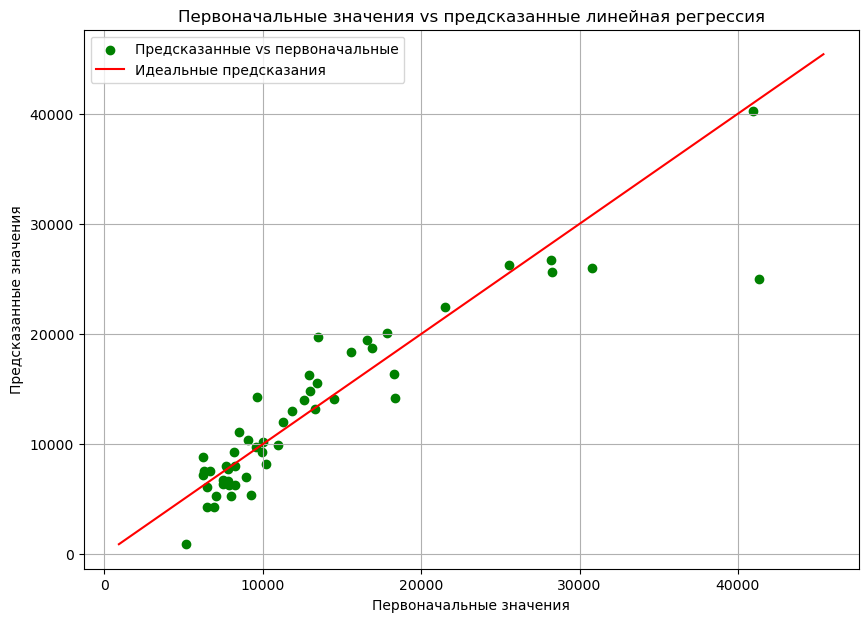

In [573]:
min_value = min(np.min(y), np.min(y_pred))
max_value = max(np.max(y), np.max(y_pred))

plt.figure(figsize = (10,7))
plt.scatter(y_test, y_pred, color='g', label='Предсказанные vs первоначальные')
plt.plot([min_value, max_value], [min_value, max_value], color='r', label='Идеальные предсказания')
plt.xlabel('Первоначальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Первоначальные значения vs предсказанные линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()

11. Реализовать регрессию методом k-ближайших соседей или деревом решений.

Далее, была реализована регрессия методом дерева решений. Аналогично модели линейной регрессии, дерево решений было обучено на имеющихся данных, и, затем, с помощью обученной модели были получены предсказанные значения.

In [576]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_tree_pred = dtr.predict(X_test)

12. Для метода реализованного в пункте 11 подсчитать метрики, выполнить визуализацию фактического и предсказанного значения. Сравнить результаты, полученные всеми методами. Для этого может потребоваться визуализировать истинные и предсказанные значения на одном графике для разных методов.

Далее, были подсчитаны метрики. Аналогично, как и с линейной регрессией, был получен коэффициент детерминации R2, равный 0.85.

In [579]:
mse_tree = mean_squared_error(y_test, y_tree_pred)
mae_tree = mean_absolute_error(y_test, y_tree_pred)
rmse_tree = root_mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)
tree_metrics = f'mse: {mse_tree:.2f}, mae: {mae_tree:.2f}, rmse: {rmse_tree:.2f}, r2: {r2_tree:.2f}'
print(tree_metrics)

metrics['Decision tree Regressor'] = {
    'MSE': mse_tree,
    'MAE': mae_tree,
    'RMSE': rmse_tree,
    'R2': r2_tree
}

mse: 10432098.50, mae: 2145.92, rmse: 3229.88, r2: 0.85


Далее, была выполнена визуализация. Можно заметить, что предсказанные значения, в целом, близки к истинным.

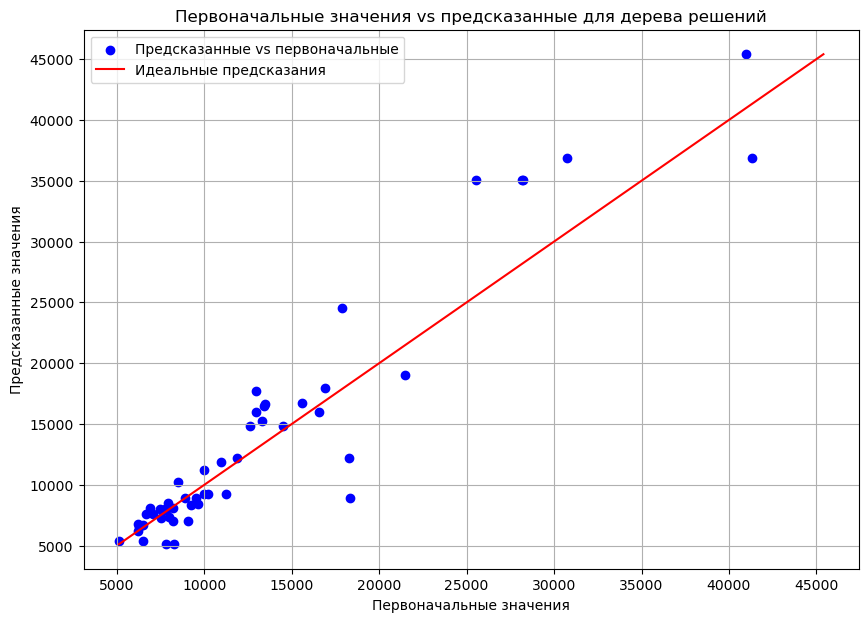

In [581]:
min_value = min(np.min(y), np.min(y_tree_pred))
max_value = max(np.max(y), np.max(y_tree_pred))

plt.figure(figsize = (10,7))
plt.scatter(y_test, y_tree_pred, color='b', label='Предсказанные vs первоначальные')
plt.plot([min_value, max_value], [min_value, max_value], color='r', label='Идеальные предсказания')
plt.xlabel('Первоначальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Первоначальные значения vs предсказанные для дерева решений')
plt.legend()
plt.grid()
plt.show()

Далее, был построен график предсказаний обеих моделей на одной плоскости.

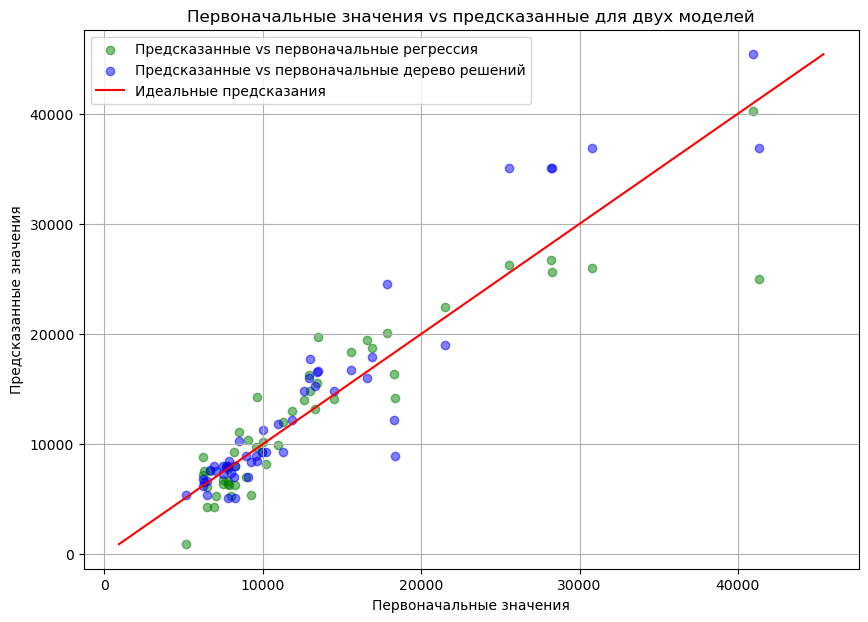

In [583]:
min_value = min(np.min(y), np.min(y_tree_pred), np.min(y_pred))
max_value = max(np.max(y), np.max(y_tree_pred), np.max(y_pred))

plt.figure(figsize = (10,7))
plt.scatter(y_test, y_pred, color='g', alpha=0.5, label='Предсказанные vs первоначальные регрессия')

plt.scatter(y_test, y_tree_pred, color='b', alpha=0.5, label='Предсказанные vs первоначальные дерево решений')
plt.plot([min_value, max_value], [min_value, max_value], color='r', label='Идеальные предсказания')
plt.xlabel('Первоначальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Первоначальные значения vs предсказанные для двух моделей')
plt.legend()
plt.grid()
plt.show()

В результате сравнения метрик модели линейной регрессии и дерева решений, можно сделать вывод, что обе модели одинаково хорошо предсказывают данные, с коэффициентом детерминации R2, равным 0.85.

In [585]:
print(f'Linear regression metrics: {lin_reg_metrics}\nTree metrics: {tree_metrics}')

Linear regression metrics: mse: 10127444.15, mae: 2085.61, rmse: 3182.36, r2: 0.85
Tree metrics: mse: 10432098.50, mae: 2145.92, rmse: 3229.88, r2: 0.85


## Вывод:
- В результате выполнения первой части лабораторной работы был изучен процесс обучения модели простой линейной регрессии, процесс предсказания значений, на основе имеющихся, подсчета метрик качества регрессии были использованы такие метрики, как средняя квадратичная ошибка - MSE, средняя абсолютная ошибка MAE (Mean absolute error), среднеквадратичная ошибка RMSE, Коэффициент детерминации R2. Касательно полученных результатов, можно сказать, что модель была неплохо обучена и она объясняет примерно половину изменений, обусловленных влиянием на целевую переменную., а также сравнения предсказанных значений с истинными. 
- Итогом выполнения второй части лабораторной работы стало обучение модели полиномиальной регрессии, получение предсказанных значений, вычисление метрик качества, а также визуализация регресии.
- В результате выполнения третьей части лабораторной работы была проведена разведка данных: были обработаны и закодированы категориальные признаки, стандартизированы числовые признаки. Также, данные были разделены на обучающую и валидационную выборки. Затем, была обучена модель линейной регрессии, было оценено ее качество с помощью метрик, а также были сделаны выводы относительно важности признаков. Далее, была реализована регрессия методом дерева решений, подсчитаны метрики для нее, а также визуализированы предсказанные значения каждой модели. В результате сравнения методов, можно сделать вывод, что обе модели обладают одинаково хорошей предсказательной способностью, с коэффициентом детерминации, равным 0.85.

## Дополнительные задания

### 7. Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений. Сравнить качество модели для подобранных параметров и любых других.

In [589]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': np.arange(1,10),
    'min_samples_leaf' : np.arange(1,10),
}

grid = GridSearchCV(model, param_grid, scoring="r2", cv=5)

grid.fit(X_train, y_train)
print(grid.best_params_)

best_model = grid.best_estimator_

print(f'MSE test: {mean_squared_error(y_test, best_model.predict(X_test))**0.5}')
print(f'R2: {r2_score(y_test, best_model.predict(X_test))}')

mse_dectree_grid = mean_squared_error(y_test, best_model.predict(X_test))
mae_dectree_grid = mean_absolute_error(y_test, best_model.predict(X_test))
rmse_dectree_grid = root_mean_squared_error(y_test, best_model.predict(X_test))
r2_dectree_grid = r2_score(y_test, best_model.predict(X_test))

metrics['GridSearchCV Decision tree Regressor'] = {
    'MSE': mse_dectree_grid,
    'MAE': mae_dectree_grid,
    'RMSE': rmse_dectree_grid,
    'R2': r2_dectree_grid
}

{'max_depth': 8, 'min_samples_leaf': 2}
MSE test: 3073.0375438261462
R2: 0.8604252972894008


В результате подбора оптимальных параметров для дерева решений с помощью GridSearchCV, метрики были улучшены, полученная модель обладает хорошей предсказательной способностью.

In [591]:
model_without_grid = DecisionTreeRegressor(random_state=42, max_depth=2, min_samples_leaf=2)
model_without_grid.fit(X_train, y_train)

print(f'RMSE test: {mean_squared_error(y_test, model_without_grid.predict(X_test))**0.5}')
print(f'R2: {r2_score(y_test, model_without_grid.predict(X_test))}')

RMSE test: 3513.2277991544966
R2: 0.8175753169818673


Для сравнения, была обучена модель дерева решений для случайных гиперпараметров. В результате, метрики качества значительно хуже, чем с подобранными параметрами GridSearchCV.

### 8. Выполнить L2-регуляризацию (Ridge). Сравнить результаты, полученные другими методами. Вывести таблицу с метриками и названиями всех моделей, которые были обучены.

In [594]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

ridge_metrics = f'mse: {ridge_mse:.2f}, mae: {ridge_mae:.2f}, rmse: {ridge_rmse:.2f}, r2: {ridge_r2:.2f}'

print(ridge_metrics)

metrics['Ridge regression'] = {
    'MSE': ridge_mse,
    'MAE': ridge_mae,
    'RMSE': ridge_rmse,
    'R2': ridge_r2
}

mse: 9442297.21, mae: 2044.22, rmse: 3072.83, r2: 0.86


В результате обучения, модель линейной регрессии с L2-регуляризацией показала улучшенные метрики качества (в сравнении с обычной моделью линейной регрессии), что говорит, об ее хорошей предсказательной способности.

In [596]:
pd.DataFrame(metrics).T

,MSE,MAE,RMSE,R2
Linear Regression,1.012744e+07,2085.613828,3182.364554,0.850318
Decision tree Regressor,1.043210e+07,2145.919865,3229.875927,0.845815
GridSearchCV Decision tree Regressor,9.443560e+06,1892.054939,3073.037544,0.860425
Ridge regression,9.442297e+06,2044.221188,3072.832115,0.860444


Для сравнения всех метрик, была создана таблица, содержащая в себе все обученные модели и их метрики. 

В результате сравнения, наилучшей моделью оказалась Ridge regression: линейная регрессия с l2-регуляризацией. Однако, модель GridSearchCV Decision tree Regressor показывает наименьшую оценку MAE и, одинаково низкие MSE и RMSE. 
Если сравнивать модели попарно (Lin reg и ridge; Decision tree и gridsearch), то можно сказать, что использованные методы улучшили показатели, в сравнении с изначальными моделями. Обе улучшенные модели показывают более хорошие метрики, в сравнении с изначальными: Ridge увеличил r2 линейной регрессии на 0.01, а gridsearchcv увеличил r2 дерева решений на 0.15.